# **Visión computacional para imágenes y video**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr. Gilberto Ochoa Ruiz**
### **Tecnológico de Monterrey**
## **5.4 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier**
---

### Equipo 37

- Jorge Luis Ancheyta Segovia - A01796354
- Omar Aguilar Macedo - A0179707

# 5. Frequency Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)
5. [Challenge](#challenge)
    1. [Aplicación Filtro Pasa Bajas](#apl-low-pass)
    1. [Aplicación Filtro Pasa Altas](#apl-high-pass)
6. [References](#references)

## Importing Libraries <a class="anchor" name="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

## Fast Fourier Transform (FFT) <a class="anchor" name="fft" ></a>

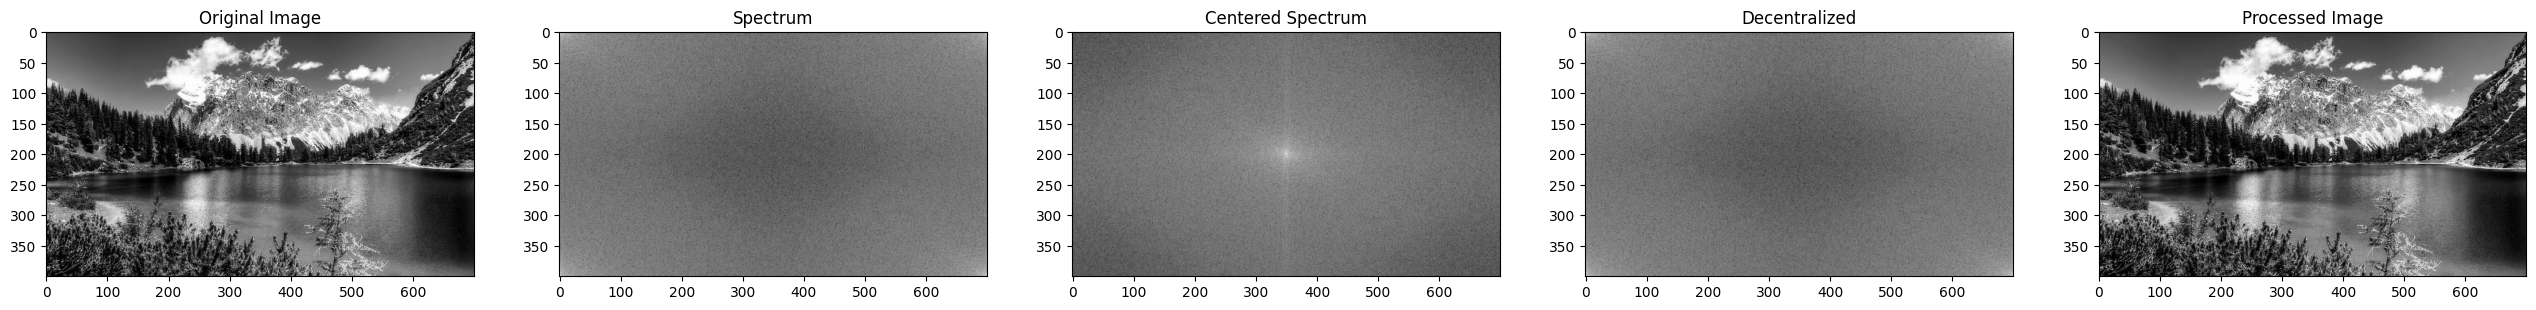

In [2]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

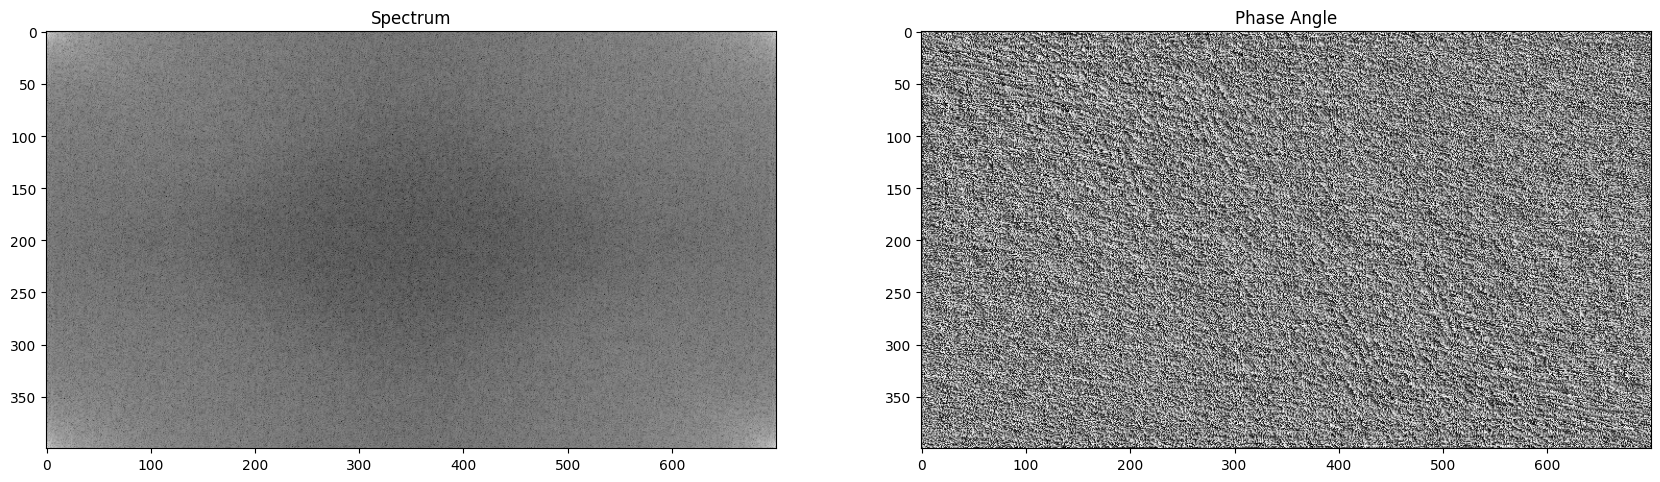

In [3]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [4]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

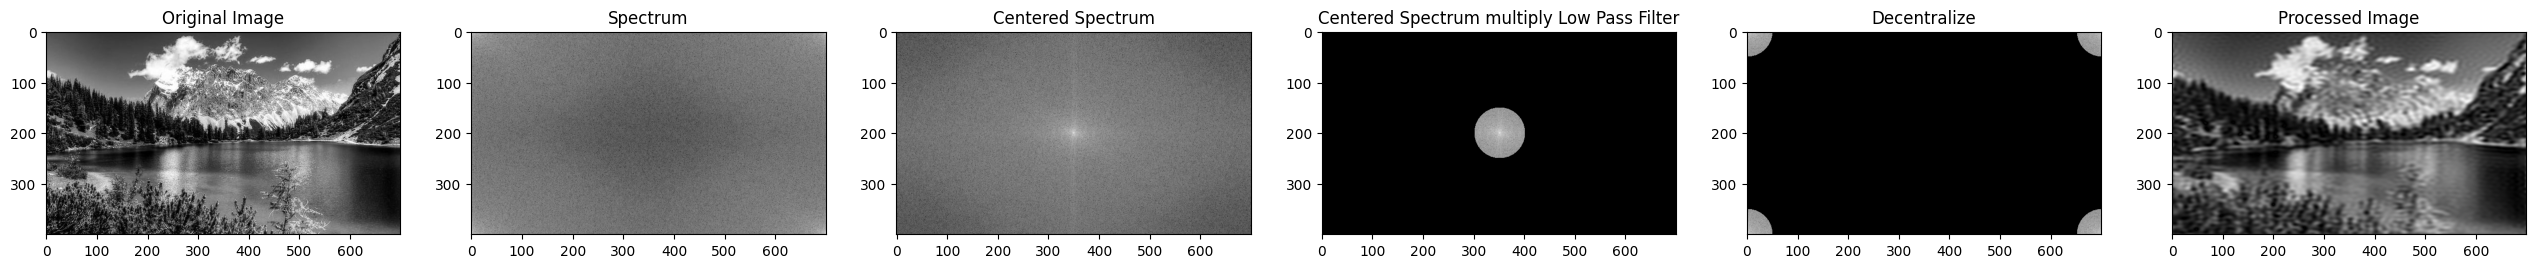

In [5]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" name="low" ></a>

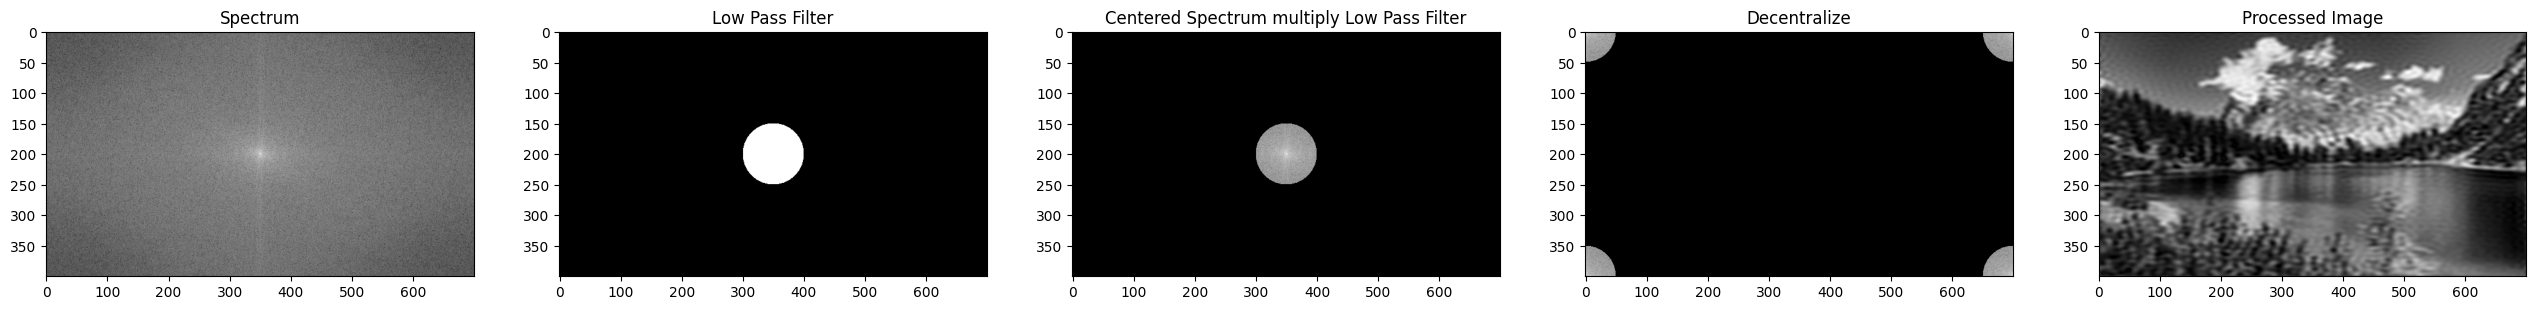

In [6]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" name="high" ></a>

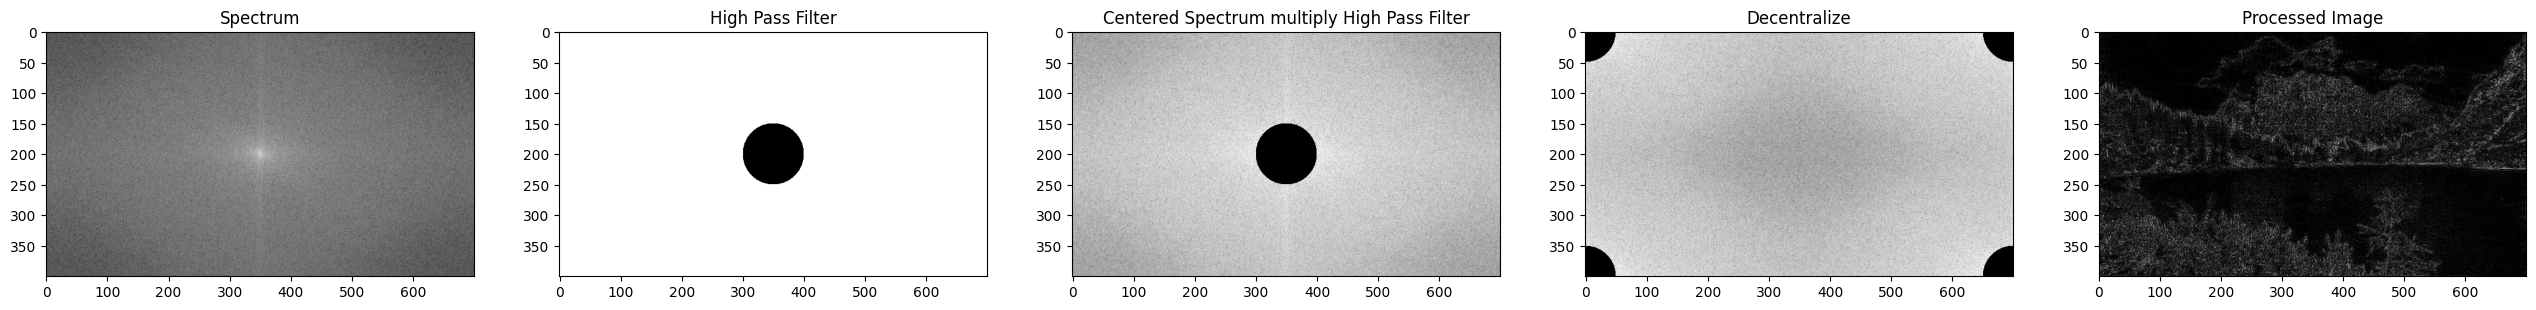

In [7]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

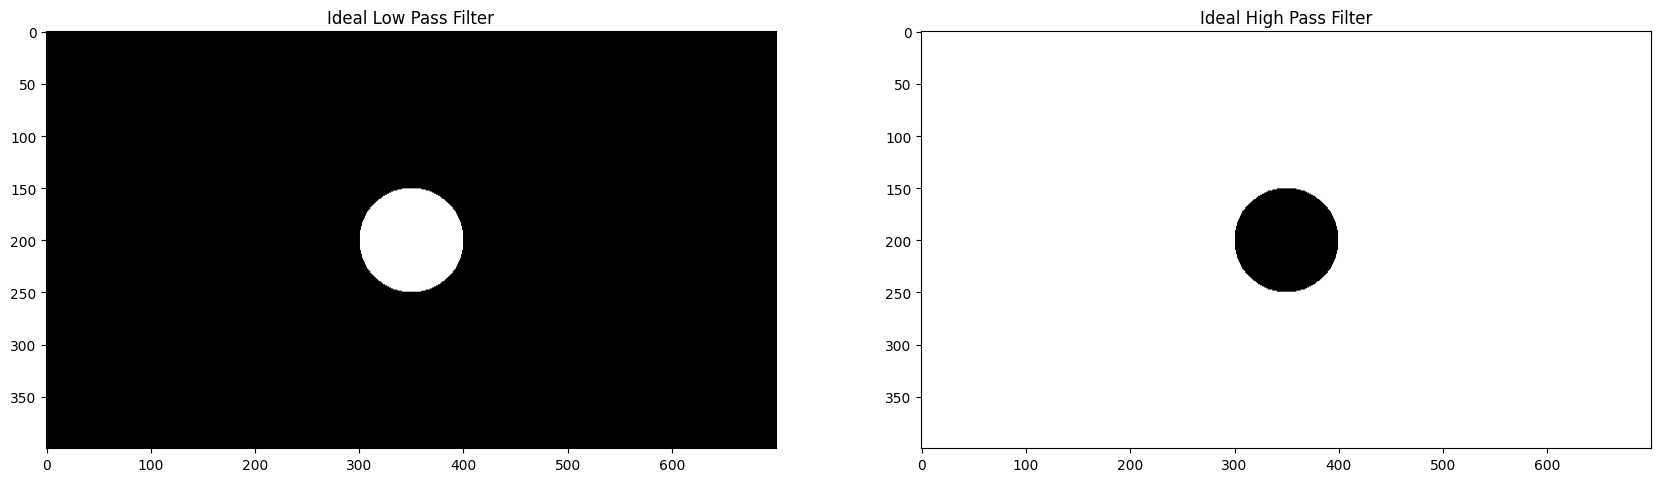

In [8]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

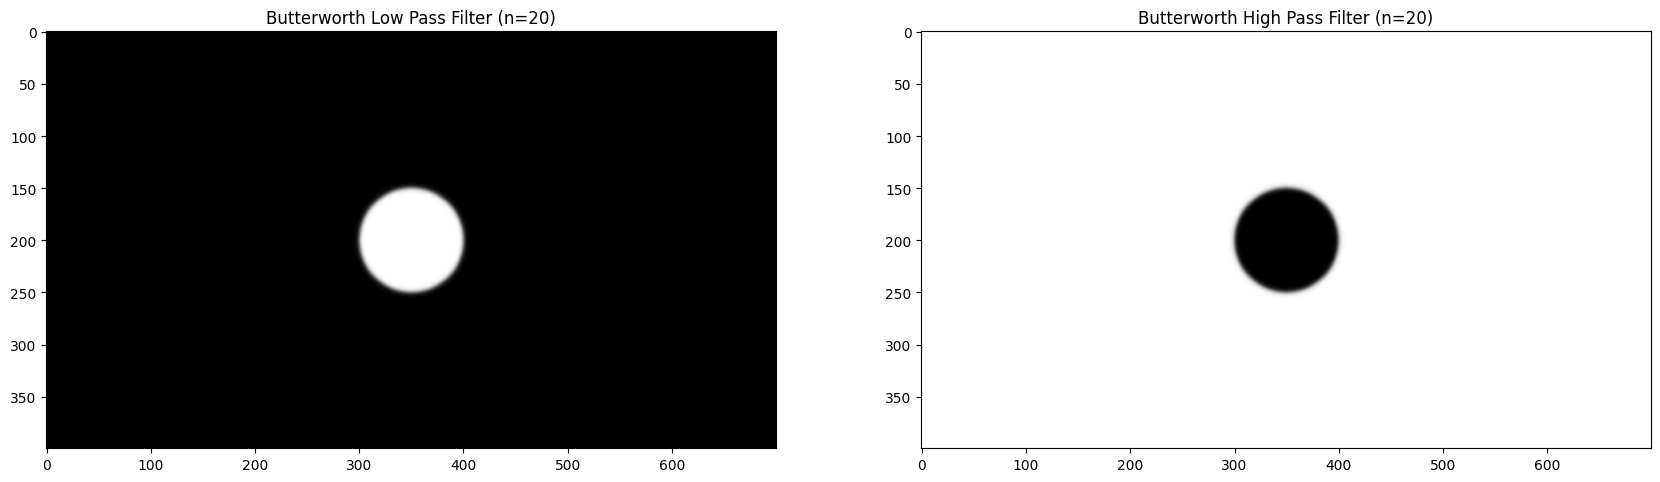

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

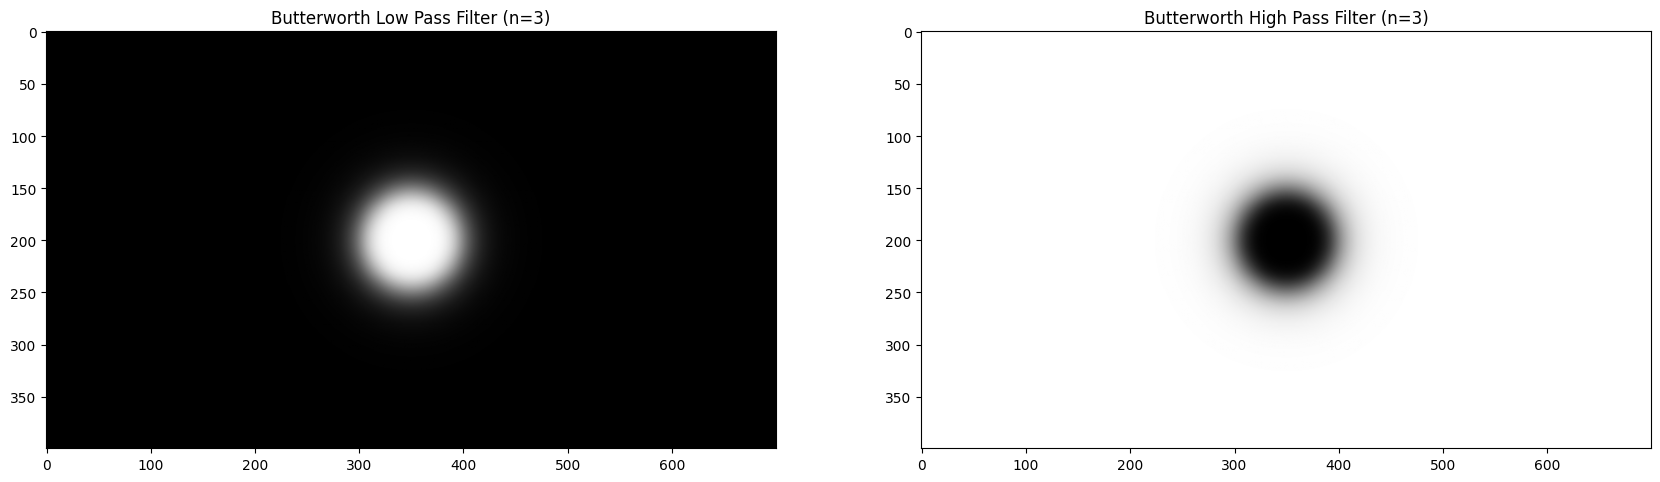

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

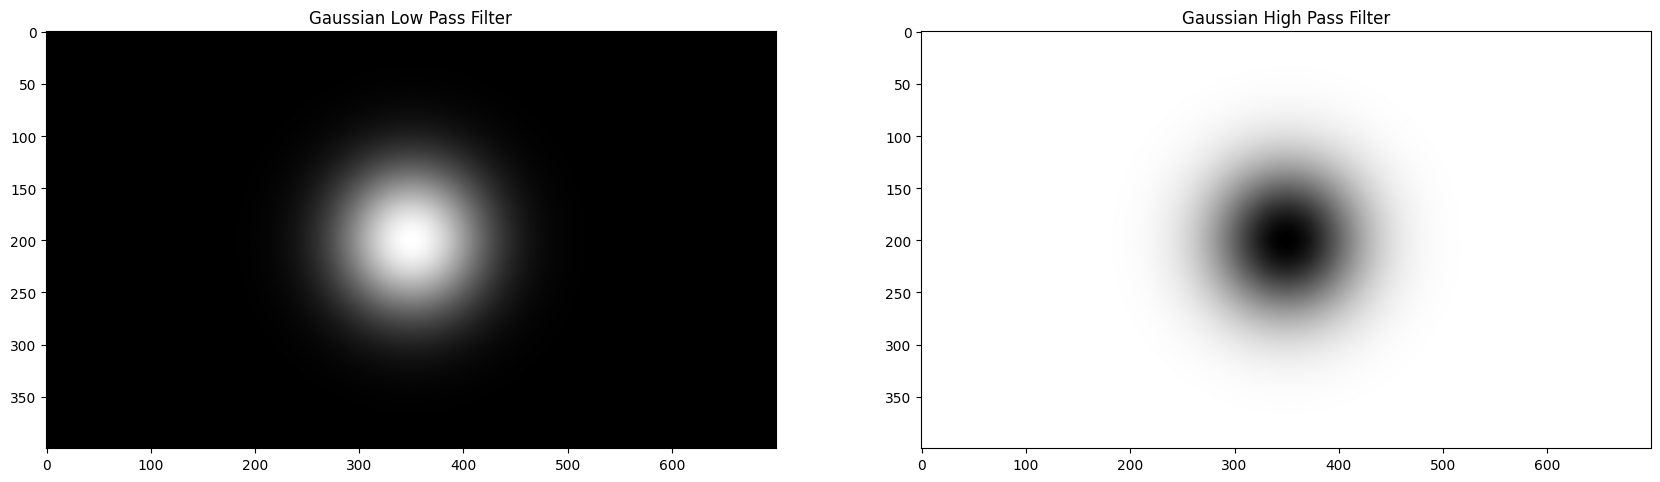

In [11]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

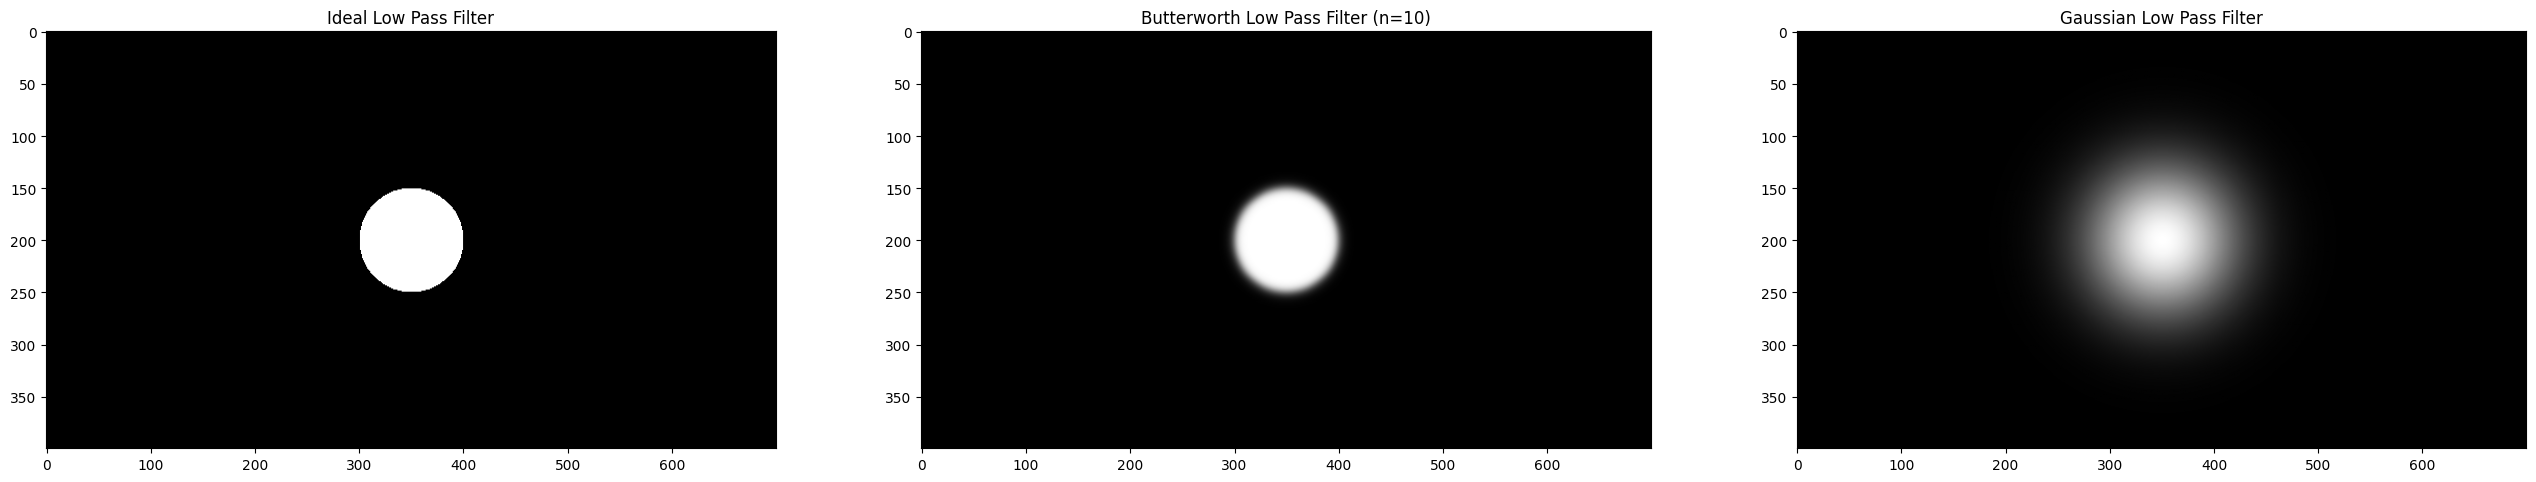

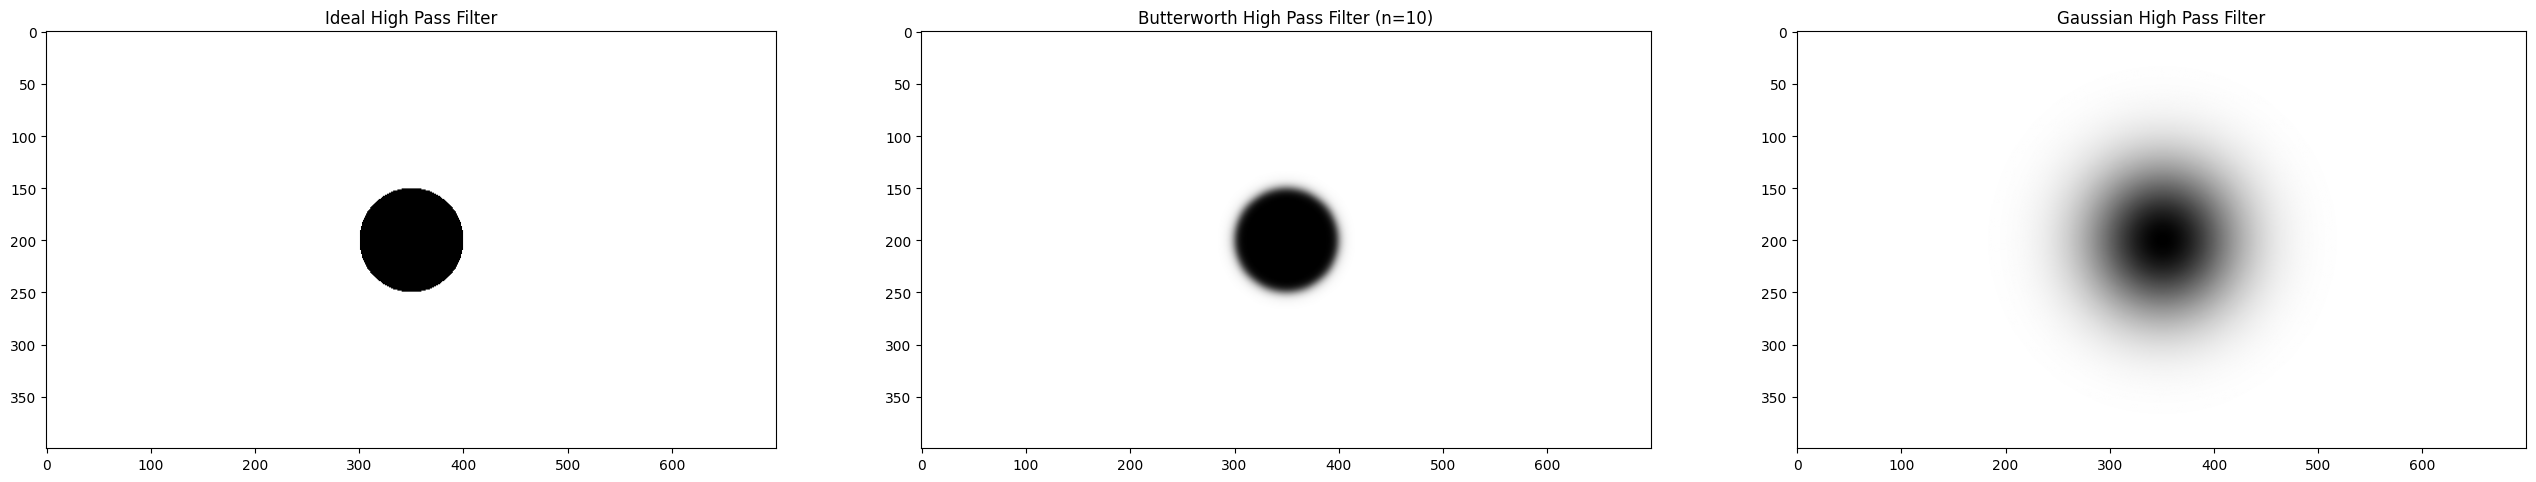

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

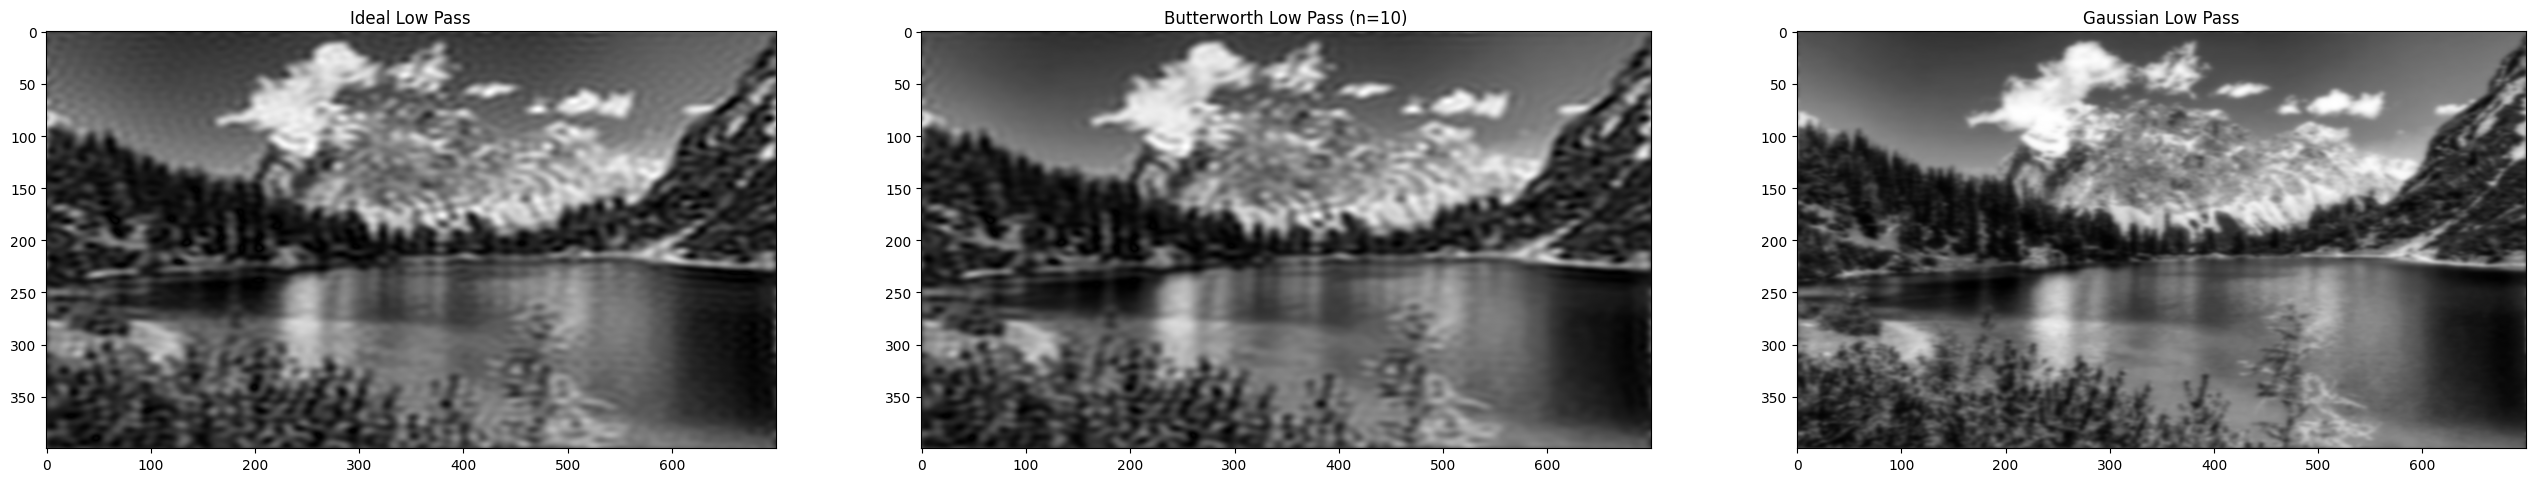

In [13]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

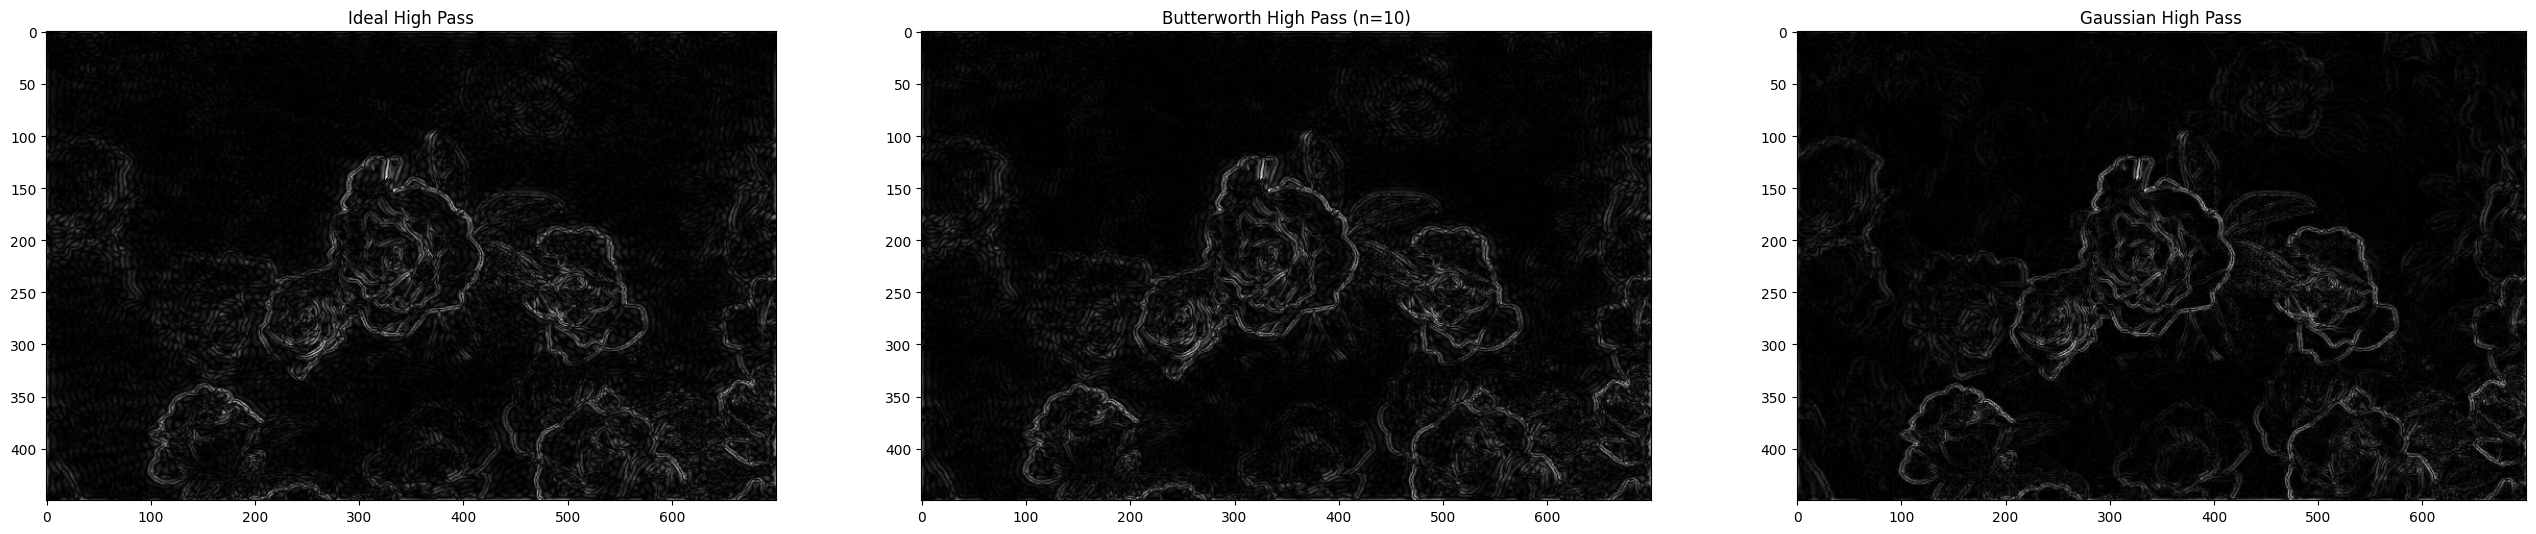

In [14]:
img = cv2.imread("data/flower_bw.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

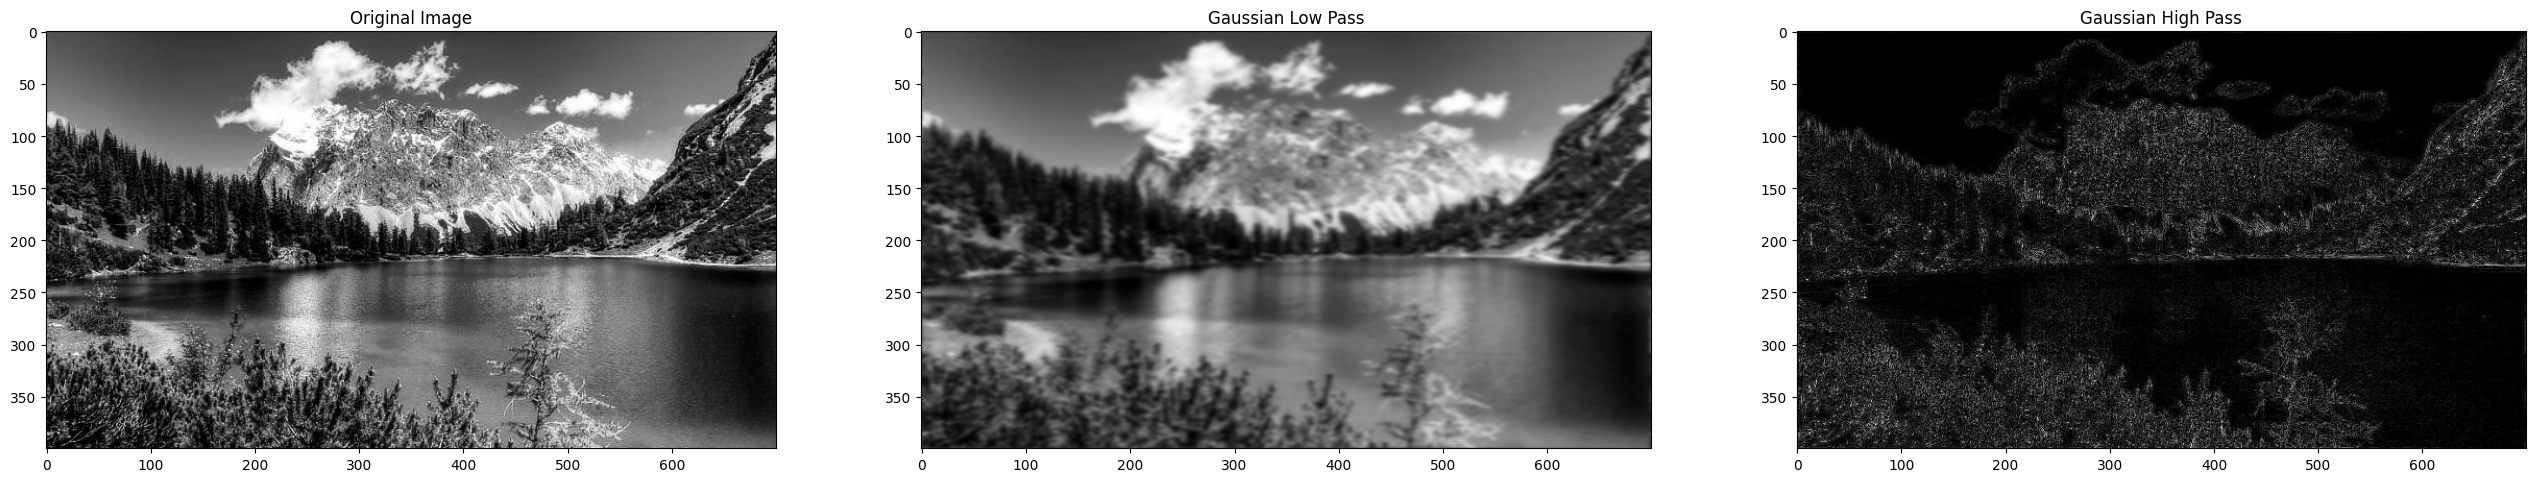

In [15]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# Challenge <a class="anchor" name="challenge" ></a>

a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

### Transformada de Fourier

La Transformada de Fourier es una herramienta fundamental en el procesamiento digital de imágenes utilizada para el mejoramiento, análisis, filtrado, reconstrucción y compresión de imágenes. [1][2]

El eje central de las transforamadas de fourier es que una señal o imagen en el dominio del tiempo o del espacio puede representarse de manera equivalente en una señal en el dominio de la frecuencia [1][2]


#### Procesamiento de Filtrado y Transformada de Fouriere para el mejoramiento de imágenes.

El mejoramiento de imágenes en el dominio de la frecuencia implica un proceso de varios pasos:
1. **Convertir del dominio a la frecuencia**: Una imagen de entrada $f(x,y)$ se transforma a su dominio de la frecuencia mediante la Transformada Discreta de Fourier (TDF), $F(u,v)$.[3][4]
   - La operación básica que se aplica es la Transformada Rápida de Fourier (FFT).
2. **Filtrado**: La transformada $F(u,v)$ se multiplica por una función de transferencia de filtro $H(u,v)$ para obtener la transformada de la imagen filtrada [4]
3. **Conversión al dominio espacial:** Se calcula la transformada inversa de foureir (TIF) de $G(u,v)$ (tomando la parte real) para obtener la imagen de salida $g(x,y)$ en el dominio espacial. [3][5]

La importancia del filtrado en el dominio de la frecuencia radica en que las características espaciales de la imagen se asocian a componentes específicos de la frecuencia.[3]

- **Frecuencias bajas**: las que se encuentran cerca del origen de la transformada, coresponden a variaciones de itnensidad lentas
- **Frecuencias altas**: corresponden a transciciones abruptas o rápidas, como bordes, contornos, detalles finos y ruido.


#### Filtros Pasa Bajas (p/suavizado)

Los filtros pasa bajas estan diseñados para permitir el paso de las frecuencias bajas y atenuar o eliminar las altas frecuencias. En el dominio espacial se traduce en suavizar la imagen o reducir el ruido.[4][6]

#### Filtros Pasa Altas (p/relazado)
Los filtros pasa altas estan diseñados para atenuar o elminar las bajas fecuencias a la vez que permite el paso de las altas frecuencias. Esta operación se utiliza para el realzado de los cambios bruscos de niveles de grises y la detección de bordes. [4][6]

Existen algunos filtros que se pueden aplicar para pasa bajas y pasa altas, como son:
1. **Ideal**: Es el más simple, deja pasar todas las frecuencias debajo de cierto radio(frecuencia de corte $D _0$) [4][6]

$
H(u, v) =
\begin{cases}
1, & \text{si } D(u,v) \leq D_0 \\
0, & \text{si } D(u,v) > D_0
\end{cases}
$

Donde:
$\
D(u,v) = \sqrt{(u - u_0)^2 + (v - v_0)^2}
\$

    - Puede generar efectos de anillo.
    - Su uso es mas para fines prácticos.

1. **Butterworth**: Introduce una transición gradual entre las fecuencias que se conservan y las que se elminan. Depende de un parametro $n$ (el orden del filtro) que controla que tan suave o abrupta es la transición [4][6]

$\
H(u, v) = \frac{1}{1 + \left(\frac{D(u,v)}{D_0}\right)^{2n}}
\$

Donde:
$\
D(u,v) = \sqrt{(u - u_0)^2 + (v - v_0)^2}
\$

    - No produce bordes tan duros como el ideal
    - Al aumentar $n$, el filtro se comporta más como el idea;/
    - Tiene buen balance entre suavizado y preservación de bordes.

1. **Gaussian**: Tiene una transción totalmente suave, siguiendo una campana de Guass, no tiene cortes abruptos ni introduce artefactos de anillos. [6]
$\
H_{HP}(u, v) = 1 - H_{LP}(u, v)
\$

   - Es el mas suave de los 3.
   - Preserva bien los bordes sin generar artefactos.
   - Es muy usado en visión como para desenfoque Gaussiano.



Sobre la frecuencia de corte $D_0$, es el radio que separa lo que el filtro deja pasar o elimina [6].
- Valores pequeños, tiene resultados mas "agresivos" lo que genera más desenfoque.
- Valores grandes, menos efecto del filtro.


Discusión:
- Los métodos espaciales son intuitivos y locales.
- Las transformadas de Fourier son globales, analíticas y potentes para filtrado selectivo, análisis espectral y restauración.
- Podemos observar como los filtros pasa bajas son parecidos a cuando se aplica un filtro gaussiano (en el dominio espacial) como sobel o laplaciano, mientras que los filtros pasa altas nos permiten obtener bordes como los operadores de Sobel y Laplaciano (en el dominio espacial) en convuluciones.

In [16]:
# Cargar imagenes en escala de grises
img = cv2.imread("data/62cropSBG.jpeg", cv2.IMREAD_GRAYSCALE)

titles = [
    'Original',
    'Ideal LP',
    'Butterworth LP',
    'Gaussian LP',
    'Espectro original',
    'Espectro Ideal',
    'Espectro Butterworth',
    'Espectro Gaussiano'
]

def apply_filter(H, fshift):
    F = fshift * H
    img_back = np.fft.ifft2(np.fft.ifftshift(F))
    return np.abs(img_back), np.log(1 + np.abs(F))

def plot_results(result_imgs, result_specs, titles):
  plt.figure(figsize=(12,6))
  all_imgs = result_imgs + result_specs
  i = 0
  for img in all_imgs:
    plt.subplot(2, 4, i + 1); plt.title(titles[i]); plt.imshow(all_imgs[i], cmap="gray"); plt.axis("off")
    i += 1

def fourier(img):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = np.log(1 + np.abs(fshift))
  return magnitude_spectrum, fshift

def process(img, filters):
  # Transformada de Fourier
  magnitude_spectrum, ffshift = fourier(img)
  imgs, specs = [img], [magnitude_spectrum]
  for H in filters:
      img_back, spec = apply_filter(H, ffshift)
      imgs.append(img_back)
      specs.append(spec)
  return imgs, specs

# Parámetros
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
D0, n = 40, 2  # parámetros

# Crear malla de distancias
U, V = np.meshgrid(np.arange(cols), np.arange(rows))
D = np.sqrt((U - ccol)**2 + (V - crow)**2)



## Aplicación de Filtro Pasa Bajas <a class="anchor" name="apl-low-pass" ></a>

In [17]:
# Filtros
H_lp_ideal = np.where(D <= D0, 1, 0)
H_lp_butter = 1 / (1 + (D / D0)**(2 * n))
H_lp_gauss = np.exp(-(D**2) / (2 * (D0**2)))

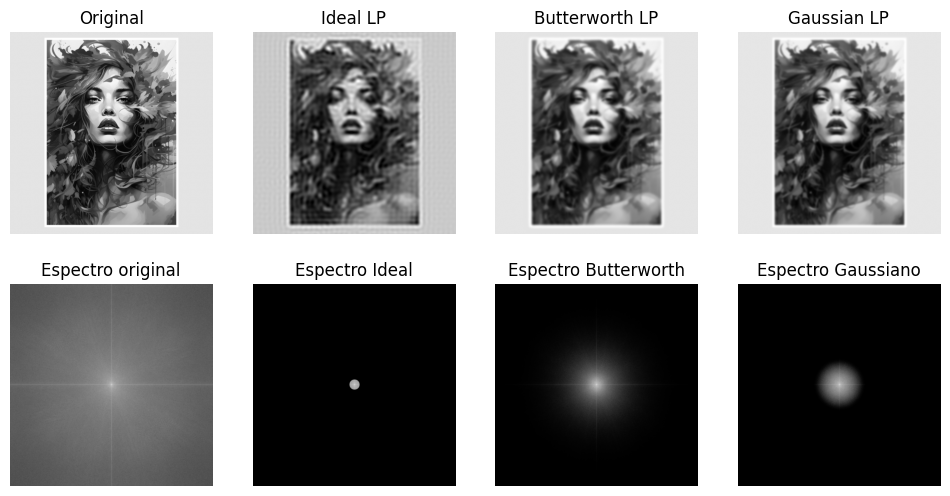

In [18]:
imgs, specs = process(img, [H_lp_ideal, H_lp_butter, H_lp_gauss])
plot_results(imgs, specs, titles)

## Aplicación de Filtro Pasa Altas <a class="anchor" name="apl-high-pass" ></a>


In [19]:
# Filtros
H_hp_ideal = 1 - H_lp_ideal
H_hp_butter = 1 - H_lp_butter
H_hp_gauss = 1 - H_lp_gauss

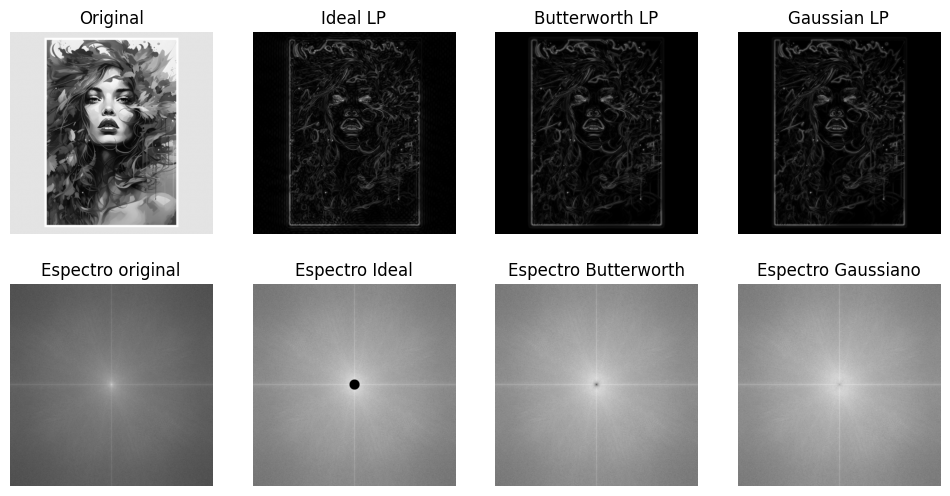

In [20]:
imgs, specs = process(img, [H_hp_ideal, H_hp_butter, H_hp_gauss])
plot_results(imgs, specs, titles)

(np.float64(-0.5), np.float64(1599.5), np.float64(1599.5), np.float64(-0.5))

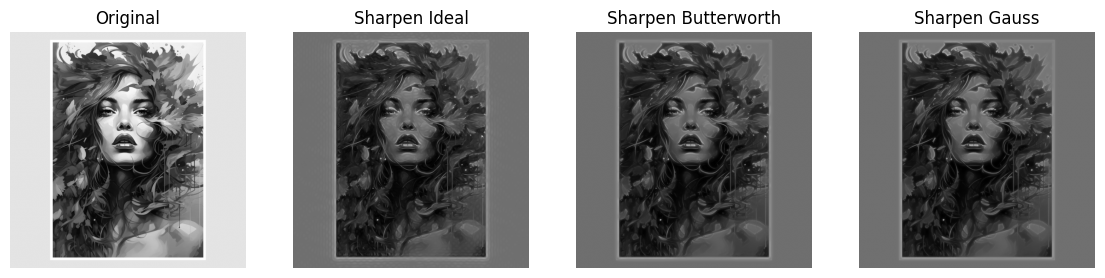

In [21]:
# Ejemplo de Realce con transformada de fourier

k = 1.5  # factor de realce
_, fshift = fourier(img)
img_hp_ideal, _ = apply_filter(H_hp_ideal, fshift)
img_sharpen_ideal = img + k * img_hp_ideal
img_hp_butter, _ = apply_filter(H_hp_butter, fshift)
img_sharpen_butter = img + k * img_hp_butter
img_hp_gauss, _ = apply_filter(H_hp_gauss, fshift)
img_sharpen_gauss = img + k * img_hp_gauss


plt.figure(figsize=(14,10))
plt.subplot(1, 4, 1); plt.title("Original"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(1, 4, 2); plt.title("Sharpen Ideal"); plt.imshow(img_sharpen_ideal, cmap="gray"); plt.axis("off")
plt.subplot(1, 4, 3); plt.title("Sharpen Butterworth"); plt.imshow(img_sharpen_butter, cmap="gray"); plt.axis("off")
plt.subplot(1, 4, 4); plt.title("Sharpen Gauss"); plt.imshow(img_sharpen_gauss, cmap="gray"); plt.axis("off")


# References <a class="anchor" name="references" />

[1] A. M. John, K. Khanna, R. R. Prasad, y L. G. Pillai, “A review on application of Fourier transform in image restoration,” Proceedings of the 2020 Fourth International Conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud), pp. 389-397, 2020

[2] A. M. John, K. Khanna, R. R. Prasad, y L. G. Pillai, “A review on application of Fourier transform in image restoration,” Proceedings of the 2020 Fourth International Conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud), pp. 389-397, 2020.

[3] W. Jumiawi, “Image Spectrum Segmentation for Lowpass and Highpass Filters,” [En línea]. Disponible: researchgate.net/publication/339406426_Image_Spectrum_Segmentation_for_Lowpass_and_Highpass_Filters

[4] R. O. Guardado Medina and D. Vallín González, “Transformada de Fourier en aplicación en el diseño de filtros digitales para el procesamiento de imágenes,” Innovation and Development for the Americas, Arequipa, Perú, 1-4 June 2010.

[5] Z. Zhou, X. Wang, C. Li, M. Zeng, y Z. Li, “Adaptive deep feature aggregation using Fourier transform and low-pass filtering for robust object retrieval,” J. Vis. Commun. Image Represent., vol. 72, art. 102860, Jul. 2020. doi: 10.1016/j.jvcir.2020.102860

[6] R. C. González and R. E. Woods, *Digital Image Processing*, 4th ed. Pearson, 2018.